# Competition

# Who survived the sinking of the Titanic?

The goal of this HW is to predict who survived the Titanic sinking in 1912.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Titanic_0.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data set description

<ul>
<li><b>Survived</b>: binary attribute that indicates whether the passenger survived. This is the dependent variable that we will attempt to explain
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The amout of the passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The amout of the passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The ticket fare
<li><b>Male</b>: binary attibute that indicates the gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

## Instruction

Cleaning the data set if necessary. 

Use everything you know to find a machine learning model to achieve the highest possible AUC score. Two testing sets have been reserved: TestA.csv and TestB.csv. Your homework will be evaluated using these two sets. 70% of the grade will be based on the AUC score on TestA.csv. 30% of the grade will be based on the ranking of the AUC score on TestB.csv among the 12 groups. To be specific, your grade on TestA.csv will be equal to the final AUC score multiplied by 70, and your grade on TestB.csv will be equal to 2.5 * (13 - your ranking). You must submit the same model for both sets with clear explanation of your codes. You must include the codes to evaluate your model on TestA.csv and TestB.csv. Failure to do so will result in 20% loss of grades (10% for each test). 

TestB.csv is private, which means you will never see it. The ranking will be revealed only after the deadline. TestA.csv is semi-private. This means that you have at most one chance everyday for me to check your model performance on TestA.csv using your code, and I will let you know the AUC score and post your score on the discussion board. I will save your notebook file in the same folder with the data files. If your code does not work on my computer, you lose the opportunity on the same day. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  713 non-null    int64  
 1   Survived     713 non-null    int64  
 2   Pclass       713 non-null    int64  
 3   Name         713 non-null    object 
 4   Sex          713 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        713 non-null    int64  
 7   Parch        713 non-null    int64  
 8   Ticket       713 non-null    object 
 9   Fare         713 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.0+ KB


Above we can see that we need to deal with 4 categorical features - Name, Sex, Ticket, and Embarked

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,713.000000,713.000000,713.000000,572.000000,713.000000,713.000000,713.000000
mean,357.000000,0.382889,2.295933,29.811486,0.513324,0.395512,31.989270
std,205.969658,0.486433,0.835113,14.528104,1.075861,0.843403,48.878417
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,179.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,357.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,535.000000,1.000000,3.000000,38.250000,1.000000,0.000000,31.000000
max,713.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


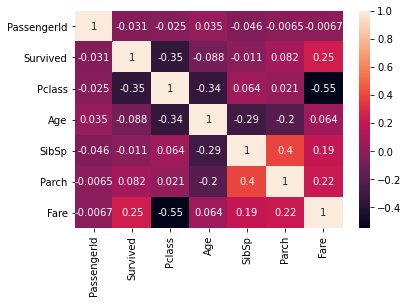

In [7]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True)

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         1
dtype: int64

In the dataset, there are missing data in Age, Cabin, and Embarked features.

The 'Age' and 'Embarked' features need to be dealt with filling some missing values

The ‘Cabin’ feature needs further investigation, but I might want to drop it from the dataset, since 549 / 713 = 77 % of it are missing.

## Data preprocessing

### Missing data

#### Age

For the missing values in 'Age' feature, we decided to fill random numbers which are computed based on mean values and standard deviation

Plus, there are huge range of age values, so we classified the age ranges

In [9]:
import numpy as np

mean = df['Age'].mean()
std = df['Age'].std()
no_of_null = df['Age'].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = no_of_null)
    
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df['Age'] = age_slice

In [10]:
df['Age'].isnull().sum()

0

In [11]:
# age categotization
# Execute only once

df['Age'] = df['Age'].astype(int)
df.loc[ df['Age'] <= 11, 'Age'] = 0
df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age'] = 2
df.loc[(df['Age'] > 22) & (df['Age'] <= 27), 'Age'] = 3
df.loc[(df['Age'] > 27) & (df['Age'] <= 33), 'Age'] = 4
df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age'] = 5
df.loc[(df['Age'] > 40) & (df['Age'] <= 66), 'Age'] = 6
df.loc[ df['Age'] > 66, 'Age'] = 6

df['Age'].value_counts()

6    134
4    126
5    123
3    103
2    100
1     75
0     52
Name: Age, dtype: int64

#### Embarked

Since the Embarked feature has only 1 missing value, we will fill it with the most common one

In [12]:
df['Embarked'].describe()

count     712
unique      3
top         S
freq      517
Name: Embarked, dtype: object

In [13]:
most_common = 'S'
df['Embarked'] = df['Embarked'].fillna(most_common)

In [14]:
df['Embarked'].isnull().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  713 non-null    int64  
 1   Survived     713 non-null    int64  
 2   Pclass       713 non-null    int64  
 3   Name         713 non-null    object 
 4   Sex          713 non-null    object 
 5   Age          713 non-null    int64  
 6   SibSp        713 non-null    int64  
 7   Parch        713 non-null    int64  
 8   Ticket       713 non-null    object 
 9   Fare         713 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     713 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 67.0+ KB


#### Convert float to int

Looks like 'Age' and 'Fare' feature are from float, I would like to convert those features to int64 using 'astype()' function pandas provides

In [16]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

#### Create new feature

In the dataset, 'Pclass' and ticket 'Fare' features seem to be inversely proportional,

so we decide to add new features (Fare / PClass)

In [17]:
naclass = 1
df['Pclass'] = df['Pclass'].fillna(naclass)
df['Fare_Per_Pclass'] = df['Fare'] / df['Pclass']
df['Fare_Per_Pclass'] = df['Fare_Per_Pclass'].astype(int)

#### Let's see after data preprocessing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      713 non-null    int64 
 1   Survived         713 non-null    int64 
 2   Pclass           713 non-null    int64 
 3   Name             713 non-null    object
 4   Sex              713 non-null    object
 5   Age              713 non-null    int64 
 6   SibSp            713 non-null    int64 
 7   Parch            713 non-null    int64 
 8   Ticket           713 non-null    object
 9   Fare             713 non-null    int64 
 10  Cabin            164 non-null    object
 11  Embarked         713 non-null    object
 12  Fare_Per_Pclass  713 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 72.5+ KB


In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Per_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,71,C85,C,71
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,53,C123,S,53
4,5,0,3,"Moran, Mr. James",male,4,0,0,330877,8,NaN,Q,2


After investigating the dataset, I've decided to choose/drop some features
to build machine learning models

What I choose are: Age, Sex, SibSp, Parch, Embarked, Fare_Per_Pclass
What I drop are: PassengerId, Name, Ticket, Cabin

## Building Machine Learning Models

In [20]:
features = ['Age', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare_Per_Pclass']

y = df['Survived']
X = df[features]

In [21]:
X.head()

,Age,Sex,SibSp,Parch,Embarked,Fare_Per_Pclass
0,2,male,1,0,S,2
1,5,female,1,0,C,71
2,3,female,0,0,S,2
3,5,female,1,0,S,53
4,4,male,0,0,Q,2


There are categorical features (Sex and Embarked), so I would like to convert them into numerical using get_dummy function 

In [22]:
X = pd.get_dummies(X)
X.head()

,Age,SibSp,Parch,Fare_Per_Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,2,1,0,2,0,1,0,0,1
1,5,1,0,71,1,0,1,0,0
2,3,0,0,2,1,0,0,0,1
3,5,1,0,53,1,0,0,0,1
4,4,0,0,2,0,1,0,1,0


#### Let's split the data into train and test set

We set the test size of 20%

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y, test_size = 0.2)

### Let's build and fit X_train and y_train data using several basic ML models

In [24]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradiant Boosting": GradientBoostingClassifier(),
    "XGB": XGBClassifier()
}
# Create a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Make a dictionary to keep model score
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        #Evalute the model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
scores = fit_and_score(models, X_train, X_test, y_train, y_test)
scores

/Users/longmini/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7762237762237763,
 'KNN': 0.7342657342657343,
 'Random Forest': 0.8251748251748252,
 'Extra Trees': 0.7622377622377622,
 'Gradiant Boosting': 0.8181818181818182,
 'XGB': 0.7692307692307693}

##### Let's plot the accuracy score

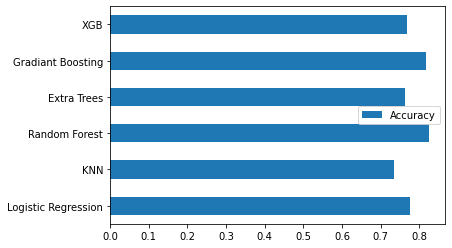

In [26]:
compare = pd.DataFrame(scores, index = ['Accuracy'])
compare.T.plot.barh()

#### Let's calculate AUC score from our models

In [27]:
from sklearn.metrics import roc_auc_score

def cal_auc_score(models, X_train, X_test, y_train, y_test):
    auc_scores = {}
    for name, model in models.items():
        prediction = model.predict_proba(X_test)
        auc_scores[name] = roc_auc_score(y_test, prediction[:,1])
        
    return auc_scores

In [28]:
auc_scores = cal_auc_score(models, X_train, X_test, y_train, y_test)
auc_scores

{'Logistic Regression': 0.7800619834710745,
 'KNN': 0.7658057851239669,
 'Random Forest': 0.8142561983471075,
 'Extra Trees': 0.7729338842975206,
 'Gradiant Boosting': 0.8351239669421486,
 'XGB': 0.7956611570247935}

##### Plot!

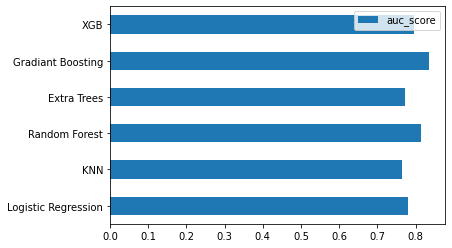

In [29]:
auc_compare = pd.DataFrame(auc_scores, index = ['auc_score'])
auc_compare.T.plot.barh()

### Let's try gridsearch to find out the best model

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer

col_cat = []
col_num = X.columns

pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore')) 
pipe_num = make_pipeline(SimpleImputer(), StandardScaler()) # default value is already mean
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))
pipe = Pipeline(steps = [("preprocessor", preprocessor) ,("classifier", SVC(probability=True))])
param_grid = [    
    {'classifier': [SVC(probability=True)], 
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier()],
     'classifier__max_features': [1,2, 3],
     'classifier__n_estimators': [5,10,20]},
    {'classifier': [LogisticRegression(solver='saga', max_iter=500)], 
     "classifier__C": [0.1, 1.0, 10],
     "classifier__penalty": ['l2', 'l1']},
    {'classifier': [(GradientBoostingClassifier())],
     'classifier__n_estimators':[100,200,300]}]

In [31]:
kfold = KFold(n_splits = 10)


gridsearch = GridSearchCV(pipe, param_grid, cv=kfold,return_train_score=True,scoring ="roc_auc",verbose=0,n_jobs=-1)
gridmodel = gridsearch.fit(X_train, y_train)

In [32]:
accuracy = gridmodel.score(X_test, y_test)
accuracy

0.834504132231405

In [33]:

y_pred_proba = gridmodel.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print('Roc score of the {} is {:.4f}'.format(gridsearch.__class__.__name__, auc_score))

Roc score of the GridSearchCV is 0.8345


In [34]:
scores = cross_validate(pipe, X_train, y_train, scoring='balanced_accuracy', cv=5, return_train_score=True)

In [35]:
df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,0.029319,0.005501,0.854870,0.811751
1,0.025209,0.004089,0.839286,0.826547
2,0.024360,0.003742,0.803571,0.813096
3,0.023966,0.005097,0.768916,0.844087
4,0.031898,0.005214,0.776286,0.841607


In [36]:
df_scores.mean()

fit_time       0.026951
score_time     0.004729
test_score     0.808586
train_score    0.827418
dtype: float64

Looks like there is no overfitting, so we decided to use gridsearch model

We will also use the whole dataset as a training set to increase score

In [37]:
finalmodel = gridsearch.fit(X, y)

### The model we choose is:

In [38]:
finalmodel.best_params_

{'classifier': GradientBoostingClassifier(), 'classifier__n_estimators': 100}

## Test!

In [ ]:
test_a = pd.read_csv("TestA.csv")
test_b = pd.read_csv("TestB.csv")

columns = ['Survived' ,'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
test_a = test_a[columns]
test_b = test_b[columns]

y_test_a = test_a['Survived']
X_test_a = test_a.drop(columns = 'Survived')

y_test_b = test_b['Survived']
X_test_b = test_b.drop(columns = 'Survived')

### Data preprocessing for testA and testB set

In [ ]:
# Execute only ONCE
dataset = [X_test_a, X_test_b]

for data in dataset:
    # Age
    mean = data['Age'].mean()
    std = data['Age'].std()
    no_of_null = data['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = no_of_null)
    
    age_slice = data["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    data['Age'] = age_slice
    data['Age'] = data['Age'].astype(int)
    
    # Age categorization
    data['Age'] = data['Age'].astype(int)
    data.loc[ data['Age'] <= 11, 'Age'] = 0
    data.loc[(data['Age'] > 11) & (data['Age'] <= 18), 'Age'] = 1
    data.loc[(data['Age'] > 18) & (data['Age'] <= 22), 'Age'] = 2
    data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 3
    data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age'] = 4
    data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age'] = 5
    data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 6
    data.loc[ data['Age'] > 66, 'Age'] = 6
    
    # Embarked
    data['Embarked'] = data['Embarked'].fillna('S')
    
    # Fare
    avg = data['Fare'].mean()
    data['Fare'] = data['Fare'].fillna(avg)
    
    # Fare per class
    data['Pclass'] = data['Pclass'].fillna(1)
    data['Fare_Per_Pclass'] = data['Fare'] / data['Pclass']
    data['Fare_Per_Pclass'] = data['Fare_Per_Pclass'].astype(int)
    
    
# drop fare and pclass features
X_test_a = X_test_a[['Age', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare_Per_Pclass']]
X_test_b = X_test_b[['Age', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare_Per_Pclass']]
    
# get dummies
X_test_a = pd.get_dummies(X_test_a)
X_test_b = pd.get_dummies(X_test_b)

### Let's calculate AUC score 

#### For TestA,

In [ ]:
predic_a = finalmodel.predict_proba(X_test_a)
auc_score_a = roc_auc_score(y_test_a, predic_a[:, 1])
auc_score_a

#### For TestB, 

In [ ]:
predic_b = finalmodel.predict_proba(X_test_b)
auc_score_b = roc_auc_score(y_test_b, predic_b[:, 1])
auc_score_b